In [2]:
# Data Analysis libraries
import pandas as pd 
import numpy as np 

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.ticker as ticker


# Linear Regression libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Graph style
sns.set_style("whitegrid")

import os
import shutil  
from os import path

In [4]:
base = pd.read_csv("Movies_new.csv")

Describe function show that the Budget and Revenue columns has 0 as a min values, however, the info() function showed that there isnt any NaN value

In [6]:
base.count()
base.isnull().sum()

ID              0
Movie           0
Year            0
Rating          0
Watched         0
Cinema          0
Vote Average    0
Vote Count      0
Runtime         0
Genres          0
Budget          0
Revenue         0
dtype: int64

This function replace all 0 value to NaN and then it is possible to fill this values with the median of the specific column

In [8]:
replace = base.replace(0, np.nan, inplace=True)

In [10]:
budget_median = base.Budget.median()
revenue_median = base.Revenue.median()

In [12]:
base["Budget"].fillna(budget_median, inplace = True)
base["Revenue"].fillna(revenue_median, inplace = True)

In [14]:
base["Profit"] = base["Revenue"] - base["Budget"]
base.to_csv("Movies_profit.csv", index=False)

# Graph Analysis

Boxplot comparing user rating and movies database average ratings

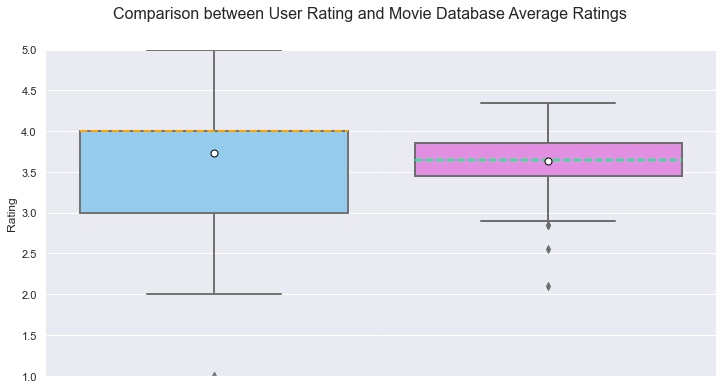

In [66]:
fig, axs = plt.subplots(ncols=2, figsize = (12,6), sharey=True)
fig.suptitle("Comparison between User Rating and Movie Database Average Ratings", fontsize=16)
plt.subplots_adjust(wspace=0, hspace=0)
plt.ylim(1,5)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2})
sns.despine(left= True)



user_boxplot = sns.boxplot(y = base["Rating"], 
                            color="lightskyblue", 
                            showmeans=True, 
                            meanprops= {"marker":"o",
                                        "markerfacecolor":"white", 
                                        "markeredgecolor":"black", 
                                        "markersize":"7"},
                            medianprops = {"color":"orange", 
                                           "linestyle":"--"}, 
                            ax=axs[0])


database_boxplot = sns.boxplot(y = base["Vote Average"], 
                           color="violet", 
                           showmeans=True,
                           meanprops= {"marker":"o",
                                       "markerfacecolor":"white", 
                                       "markeredgecolor":"black", 
                                       "markersize":"7"},
                           medianprops = {"color":"springgreen", 
                                          "linestyle":"--"},
                           ax=axs[1]).set(ylabel=None)

plt.savefig("Graphs/Boxplot_Ratings")

# Transform the genres in a Series of genres

In [53]:
df_genres_id= pd.Series(base["Genres"].values, index = base["ID"], name = "Genres")
split_genres = df_genres_id.str.split("|", expand = False)
genres_explode = split_genres.explode()


ID
281957            Western
281957              Drama
281957          Adventure
273248              Crime
273248              Drama
               ...       
324857    Science Fiction
324857             Comedy
530385             Horror
530385              Drama
530385            Mystery
Name: Genres, Length: 769, dtype: object

In [20]:
genres_explode.unique()

array(['Western', 'Drama', 'Adventure', 'Crime', 'Mystery', 'Thriller',
       'Fantasy', 'Action', 'Animation', 'Family', 'Comedy', 'War',
       'Romance', 'History', 'Horror', 'Science Fiction', 'Music',
       'Documentary'], dtype=object)

In [52]:
genres_count = genres_explode.value_counts()

Drama              141
Thriller           112
Action              69
Crime               65
Adventure           59
Mystery             58
Horror              53
Science Fiction     48
Fantasy             40
Comedy              39
Family              17
Romance             15
Animation           14
History             14
War                 12
Western              6
Music                4
Documentary          3
Name: Genres, dtype: int64

# WordCloud dos generos

In [54]:
all_genres = " ".join(s for s in genres_explode).strip()

all_genres

'Western Drama Adventure Crime Drama Mystery Western Thriller Drama Mystery Fantasy Drama Mystery Action Crime Drama Crime Thriller Action Crime Thriller Animation Family Fantasy Drama Comedy War Drama Romance Drama Thriller Comedy Drama Crime Thriller Drama Mystery Crime Drama Crime Action Thriller Drama Thriller History Crime Drama Thriller Action Adventure Comedy Drama Thriller Western Drama Crime Crime Drama Mystery Crime Drama Thriller Thriller Mystery Drama Crime Mystery Thriller Adventure Action Action Drama History War Crime Drama Mystery Crime Thriller Adventure Action Horror Mystery Thriller Mystery Horror Drama Drama Thriller Comedy Action Adventure Fantasy Drama Science Fiction Thriller Crime Drama Thriller Crime Mystery Crime Drama Mystery Thriller Science Fiction Drama Horror Crime Thriller Drama Mystery Adventure Drama Family Fantasy Horror Thriller Adventure Action Science Fiction Adventure Action Fantasy Horror Action Drama Drama Thriller Mystery Action Drama Crime Thr

(-0.5, 1599.5, 799.5, -0.5)

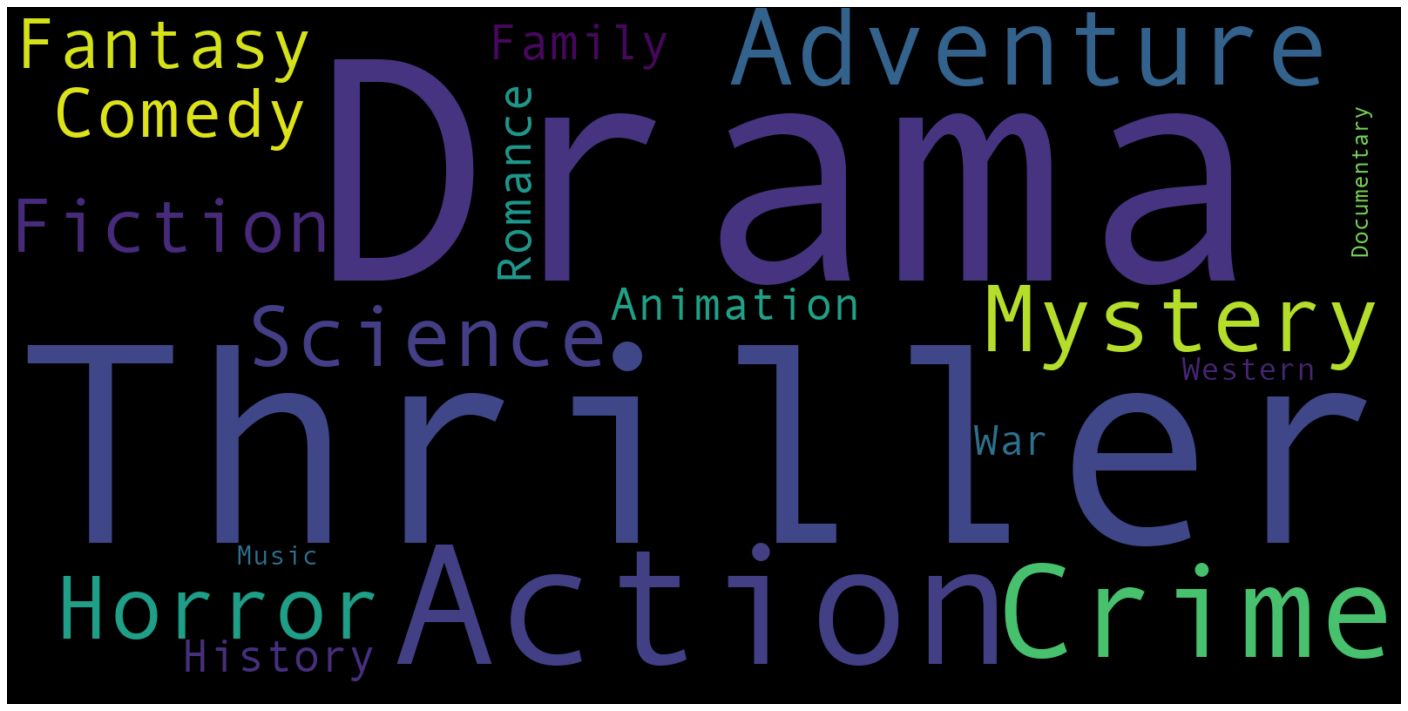

In [59]:
all_genres = " ".join(s for s in genres_explode)


wordcloud = WordCloud(background_color="black",
                      font_path='Andale Mono',
                      width=1600, height=800,
                      collocations=False,
                      colormap = "viridis").generate(all_genres)

plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.tight_layout(pad=0)
plt.axis("off")

In [28]:
wordcloud.words_

{'Drama': 1.0,
 'Thriller': 0.7943262411347518,
 'Action': 0.48936170212765956,
 'Crime': 0.46099290780141844,
 'Adventure': 0.41843971631205673,
 'Mystery': 0.41134751773049644,
 'Horror': 0.375886524822695,
 'Science': 0.3404255319148936,
 'Fiction': 0.3404255319148936,
 'Fantasy': 0.28368794326241137,
 'Comedy': 0.2765957446808511,
 'Family': 0.12056737588652482,
 'Romance': 0.10638297872340426,
 'Animation': 0.09929078014184398,
 'History': 0.09929078014184398,
 'War': 0.0851063829787234,
 'Western': 0.0425531914893617,
 'Music': 0.028368794326241134,
 'Documentary': 0.02127659574468085}

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

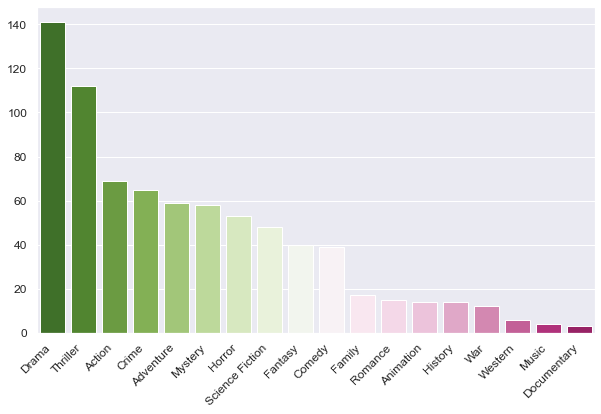

In [30]:
palette = sns.color_palette("PiYG_r", 18)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})
sns.set(rc={'figure.figsize':(10,6)})


barplot = sns.barplot(genres_count.index,
                      genres_count.values,
                      palette = palette
                      )

plt.xticks(rotation=45, fontsize=12, ha = "right")
plt.yticks(fontsize=12)

# Top 10 voted movies

In [32]:
vote_count = base.sort_values("Vote Count", ascending= False)
top_voted = vote_count.head(n =10)

top_voted

,ID,Movie,Year,Rating,Watched,Cinema,Vote Average,Vote Count,Runtime,Genres,Budget,Revenue,Profit
19,293660,Deadpool,2016,5,2016-02-11,True,3.80,23209,108,Action|Adventure|Comedy,58000000.0,7.831000e+08,7.251000e+08
198,299536,Avengers: Infinity War,2018,4,2018-04-22,True,4.15,18946,149,Adventure|Action|Science Fiction,300000000.0,2.046240e+09,1.746240e+09
110,671,Harry Potter and the Sorcerer's Stone,2001,4,2016-11-13,False,3.95,17486,152,Adventure|Fantasy|Family,125000000.0,9.764756e+08,8.514756e+08
148,120,The Lord of the Rings: The Fellowship of the Ring,2001,4,2017-06-18,False,4.15,17404,178,Adventure|Fantasy|Action,93000000.0,8.713684e+08,7.783684e+08
45,271110,Captain America 3: Civil War,2016,4,2016-04-28,True,3.70,16470,147,Adventure|Action|Science Fiction,250000000.0,1.153296e+09,9.032963e+08
85,297761,Suicide Squad,2016,3,2016-08-05,True,2.95,15786,123,Action|Adventure|Crime|Fantasy|Science Fiction,175000000.0,7.468469e+08,5.718469e+08
188,284054,Black Panther,2018,3,2018-03-13,True,3.70,15459,134,Action|Adventure|Fantasy|Science Fiction,200000000.0,1.346739e+09,1.146739e+09
106,284052,Doctor Strange,2016,4,2016-11-03,True,3.70,15387,115,Action|Adventure|Fantasy|Science Fiction,165000000.0,6.777000e+08,5.127000e+08
141,283995,Guardians of the Galaxy Vol. 2,2017,4,2017-05-01,True,3.80,15122,137,Action|Adventure|Comedy|Science Fiction,200000000.0,8.637561e+08,6.637561e+08
180,297762,Wonder,2017,4,2018-01-02,True,3.65,14914,141,Action|Adventure|Fantasy,149000000.0,8.218470e+08,6.728470e+08


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

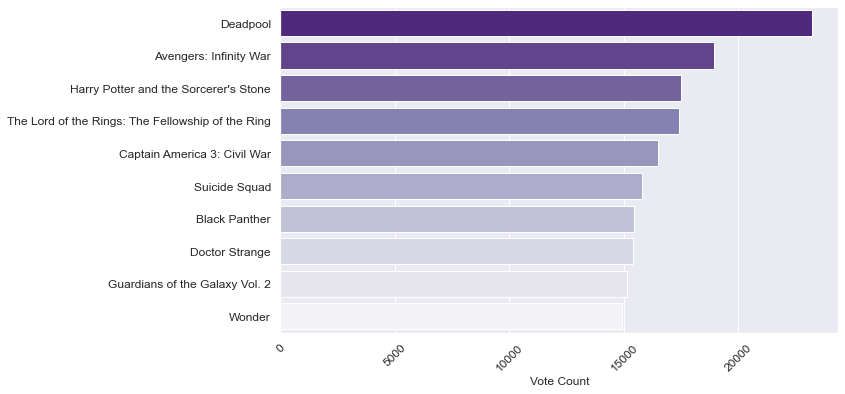

In [34]:
palette = sns.color_palette("Purples_r", 10)
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2})
sns.set(rc={'figure.figsize':(10,6)})


barplot = sns.barplot(x= top_voted["Vote Count"],
                      y = top_voted["Movie"], 
                      palette = palette,
                      orient = "h").set(ylabel = None)

plt.xticks(rotation=45, fontsize=12, ha = "center")
plt.yticks(fontsize=12)


#img = plt.savefig("Barplot_votecount", bbox_inches='tight')

# Finding the linear correlation between Budget and Revenue

* Trying to discover if it is possible to predict the Revenue by the Budget

In [36]:
base.corr()

,ID,Year,Rating,Cinema,Vote Average,Vote Count,Runtime,Budget,Revenue,Profit
ID,1.000000,0.669503,-0.097527,0.292603,-0.192908,0.075599,0.033572,0.062481,0.103909,0.108370
Year,0.669503,1.000000,-0.173690,0.271766,-0.348689,0.216815,0.106775,0.293246,0.252394,0.234251
Rating,-0.097527,-0.173690,1.000000,0.063873,0.508821,0.246837,0.144227,-0.017722,0.108929,0.130652
Cinema,0.292603,0.271766,0.063873,1.000000,-0.118258,0.417419,0.071396,0.485376,0.461149,0.438326
Vote Average,-0.192908,-0.348689,0.508821,-0.118258,1.000000,0.259949,0.266657,-0.025539,0.118424,0.143324
Vote Count,0.075599,0.216815,0.246837,0.417419,0.259949,1.000000,0.142080,0.620827,0.736000,0.731085
Runtime,0.033572,0.106775,0.144227,0.071396,0.266657,0.142080,1.000000,0.267214,0.218833,0.200447
Budget,0.062481,0.293246,-0.017722,0.485376,-0.025539,0.620827,0.267214,1.000000,0.840982,0.775839
Revenue,0.103909,0.252394,0.108929,0.461149,0.118424,0.736000,0.218833,0.840982,1.000000,0.993840
Profit,0.108370,0.234251,0.130652,0.438326,0.143324,0.731085,0.200447,0.775839,0.993840,1.000000


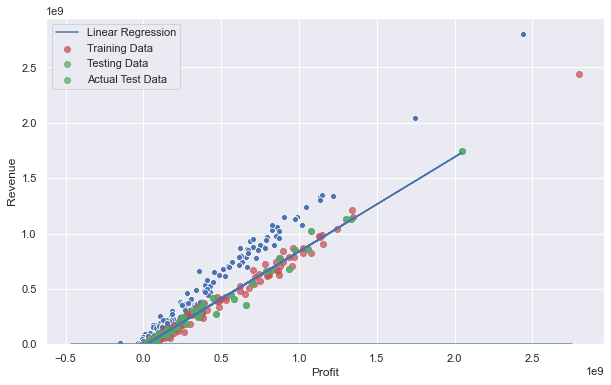

In [38]:
ax = sns.scatterplot(x=base['Profit'], y=base['Revenue'])  
#ax.set_yscale('log')
#ax.set_xscale('log')

X_train, X_test, y_train, y_test = train_test_split(base.Revenue, base.Profit)

plt.scatter(X_train,y_train, label = "Training Data", color = "r", alpha= .7)
plt.scatter(X_test,y_test, label = "Testing Data", color = "g", alpha= .7)
plt.legend()
#plt.yscale('log')
#plt.xscale('log')


lr = LinearRegression()
lr.fit(X_train.values.reshape(-1,1), y_train.values)

prediction = lr.predict(X_test.values.reshape(-1,1))
plt.plot(X_test,prediction,label = "Linear Regression", color = "b")
plt.scatter(X_test,y_test, label = "Actual Test Data", color = "g", alpha=.7)
plt.legend()


sns.distplot(base['Profit'])

corre = np.corrcoef(base["Profit"],base["Revenue"])

# Scatterplot Revenue x Profit

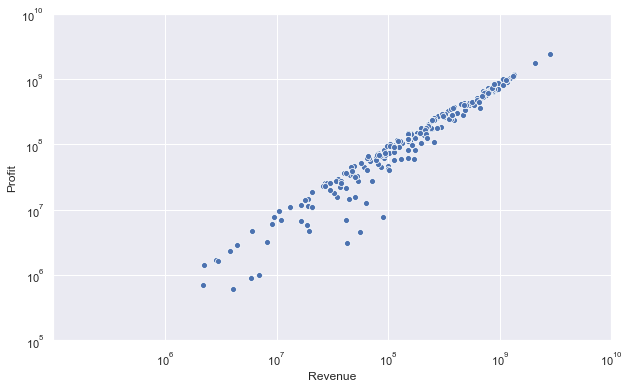

In [40]:
plt.xscale('log')
plt.yscale('log')
plt.xlim(100000,10000000000)
plt.xticks([1e6, 1e7, 1e8, 1e9, 1e10])
plt.ylim(100000,10000000000)
plt.yticks([1e5,1e6, 1e7, 1e8, 1e9, 1e10])



ax = sns.scatterplot(x=base['Revenue'], y=base['Profit'])

This is a little mess because of 2 movies with higher revenue and profit. Let's find out which movies are they

In [42]:
base.sort_values("Profit", ascending= False).head(10)

,ID,Movie,Year,Rating,Watched,Cinema,Vote Average,Vote Count,Runtime,Genres,Budget,Revenue,Profit
241,299534,Avengers: Endgame,2019,4,2019-04-21,False,4.15,14180,181,Adventure|Science Fiction|Action,356000000.0,2.797801e+09,2.441801e+09
198,299536,Avengers: Infinity War,2018,4,2018-04-22,True,4.15,18946,149,Adventure|Action|Science Fiction,300000000.0,2.046240e+09,1.746240e+09
119,12445,Harry Potter and the Deathly Hallows Part II,2011,5,2016-12-18,False,4.05,14032,130,Fantasy|Adventure,125000000.0,1.341511e+09,1.216511e+09
188,284054,Black Panther,2018,3,2018-03-13,True,3.70,15459,134,Action|Adventure|Fantasy|Science Fiction,200000000.0,1.346739e+09,1.146739e+09
228,351286,Jurassic World: Fallen Kingdom,2018,3,2018-10-28,False,3.25,7822,129,Action|Adventure|Science Fiction,170000000.0,1.303460e+09,1.133460e+09
179,181808,Star Wars: Episode VIII The Last Jedi,2017,4,2017-12-26,True,3.50,10769,152,Science Fiction|Action|Adventure,200000000.0,1.332540e+09,1.132540e+09
208,260513,Incredibles 2,2018,5,2018-06-28,True,3.75,8746,118,Action|Adventure|Animation|Family,200000000.0,1.242805e+09,1.042805e+09
247,475557,Joker,2019,5,2019-10-01,True,4.10,13785,122,Crime|Thriller|Drama,55000000.0,1.074251e+09,1.019251e+09
233,297802,Aquaman,2018,4,2018-12-09,True,3.45,8949,144,Action|Adventure|Fantasy,160000000.0,1.148462e+09,9.884618e+08
237,299537,Captain Marvel,2019,3,2019-03-16,True,3.50,9718,124,Action|Adventure|Science Fiction,152000000.0,1.128275e+09,9.762748e+08


In [44]:
base.describe()

,ID,Year,Rating,Vote Average,Vote Count,Runtime,Budget,Revenue,Profit
count,277.000000,277.000000,277.000000,277.000000,277.000000,277.000000,2.770000e+02,2.770000e+02,2.770000e+02
mean,208317.862816,2008.137184,3.732852,3.638267,5536.353791,121.938628,5.748384e+07,2.917020e+08,2.342182e+08
std,180983.979584,14.994055,0.808091,0.322352,4507.383687,29.889286,6.571422e+07,3.741193e+08,3.208311e+08
min,24.000000,1940.000000,1.000000,2.100000,137.000000,81.000000,3.250000e+05,5.638500e+04,-1.510000e+08
25%,9426.000000,2004.000000,3.000000,3.450000,1972.000000,105.000000,1.300000e+07,4.666586e+07,2.728171e+07
50%,263115.000000,2015.000000,4.000000,3.650000,4039.000000,118.000000,3.000000e+07,1.518660e+08,1.218660e+08
75%,346685.000000,2017.000000,4.000000,3.850000,8329.000000,133.000000,8.200000e+07,3.635333e+08,2.915159e+08
max,619264.000000,2020.000000,5.000000,4.350000,23209.000000,467.000000,3.560000e+08,2.797801e+09,2.441801e+09


In [46]:
base.sort_values("Budget",ascending = False).head(10)
base.sort_values("Revenue",ascending = False).head(10)

,ID,Movie,Year,Rating,Watched,Cinema,Vote Average,Vote Count,Runtime,Genres,Budget,Revenue,Profit
241,299534,Avengers: Endgame,2019,4,2019-04-21,False,4.15,14180,181,Adventure|Science Fiction|Action,356000000.0,2.797801e+09,2.441801e+09
198,299536,Avengers: Infinity War,2018,4,2018-04-22,True,4.15,18946,149,Adventure|Action|Science Fiction,300000000.0,2.046240e+09,1.746240e+09
188,284054,Black Panther,2018,3,2018-03-13,True,3.70,15459,134,Action|Adventure|Fantasy|Science Fiction,200000000.0,1.346739e+09,1.146739e+09
119,12445,Harry Potter and the Deathly Hallows Part II,2011,5,2016-12-18,False,4.05,14032,130,Fantasy|Adventure,125000000.0,1.341511e+09,1.216511e+09
179,181808,Star Wars: Episode VIII The Last Jedi,2017,4,2017-12-26,True,3.50,10769,152,Science Fiction|Action|Adventure,200000000.0,1.332540e+09,1.132540e+09
228,351286,Jurassic World: Fallen Kingdom,2018,3,2018-10-28,False,3.25,7822,129,Action|Adventure|Science Fiction,170000000.0,1.303460e+09,1.133460e+09
208,260513,Incredibles 2,2018,5,2018-06-28,True,3.75,8746,118,Action|Adventure|Animation|Family,200000000.0,1.242805e+09,1.042805e+09
45,271110,Captain America 3: Civil War,2016,4,2016-04-28,True,3.70,16470,147,Adventure|Action|Science Fiction,250000000.0,1.153296e+09,9.032963e+08
233,297802,Aquaman,2018,4,2018-12-09,True,3.45,8949,144,Action|Adventure|Fantasy,160000000.0,1.148462e+09,9.884618e+08
274,429617,Spider-Man: Far from Home,2019,5,2020-05-02,False,3.75,7857,129,Action|Adventure|Science Fiction,160000000.0,1.131928e+09,9.719280e+08


 Tentar fazer o gráfico abaixo ficar legal

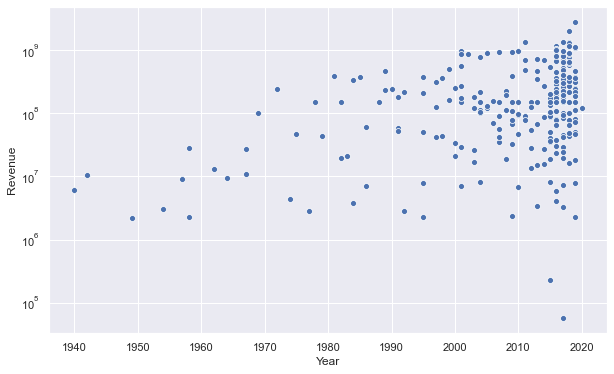

In [63]:
plt.yscale("log")
sns.scatterplot(data = base, x = "Year", y = "Revenue")


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 <a list of 8 Text major ticklabel objects>)

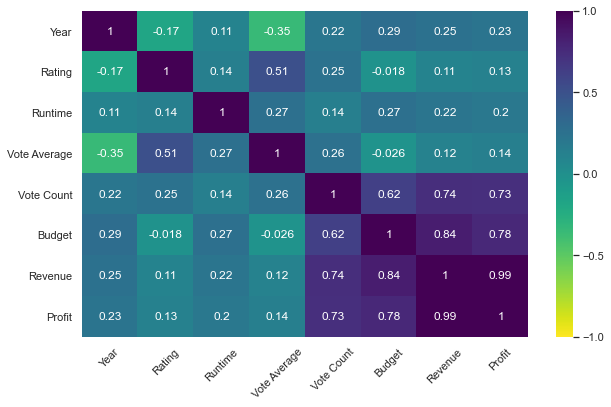

In [70]:
#mask = np.triu(base.corr())
values = base[["Year", "Rating","Runtime", "Vote Average", "Vote Count", "Budget", "Revenue", "Profit"]]
sns.set(rc={'figure.figsize':(10,6)})


sns.heatmap(values.corr(), 
            annot = True, 
            vmin=-1, vmax=1, center= 0, 
            cmap= 'viridis_r',
            cbar_kws = {"ticks":[-1, -.5,0,.5,1]}
            )
            
plt.xticks(rotation = 45, ha = "center")
